# Prepare Datasets and Create the Project Structure

Notebook to preprocess the dataset and create a proper folder structure to store the data. This notebook must be run before running the `data_augmentation_using_generative_adversarial_networks.ipynb` notebook that should be available in the same directory.

---
## Prerequisites

Ensure that the Cityscapes dataset is downloaded and placed in the directory named **dataset**. The dataset can be downloaded from [here](https://www.cityscapes-dataset.com/). You need to register to access the dataset. The following datasets are required for data augmentation:
1. [gtFine_trainvaltest.zip](https://www.cityscapes-dataset.com/file-handling/?packageID=1) (241MB): Fine annotations for training and validation datasets (3475 annotated images) and dummy annotations (ignore regions) for the test set (1525 images).
2. [leftImg8bit_trainvaltest.zip](https://www.cityscapes-dataset.com/file-handling/?packageID=3) (11GB): Left 8-bit images - training, validation, and test datasets (5000 images).

### 1. Check Python version

It is crucial to ensure that the notebook runs on the correct version of Python to guarantee proper functionality. 

In [1]:
import platform
assert (platform.python_version_tuple()[:2] >= ('3','7')), "[ERROR] The notebooks are tested on Python 3.7 and higher. Please updated your Python to evaluate the code"

### 2. Check Notebook server has access to all required resources

In [2]:
from pathlib import Path

dataset_folder = Path("dataset")
dataset_folder = Path.joinpath(Path.cwd(), dataset_folder)

if not dataset_folder.exists():
    raise FileNotFoundError("[ERROR] Add `{}` folder in the current directory (`{}`)".format(dataset_folder.name, Path.cwd()))

In [3]:
expected_zipped_datasets = ["gtFine_trainvaltest.zip", "leftImg8bit_trainvaltest.zip"]
expected_zipped_datasets_path = list()

for zipped_dataset in expected_zipped_datasets:
    zipped_dataset = Path.joinpath(dataset_folder, zipped_dataset)
    expected_zipped_datasets_path.append(zipped_dataset)
    if not zipped_dataset.exists():
        raise FileNotFoundError("[ERROR] Download and place `{}` in the current directory (`{}`)".format(zipped_dataset.name, Path.cwd()))

---
## Discover Datasets

### 1. Unzip Datasets

In [4]:
import zipfile as zf

unzipped_datasets_name = [str(dataset_name).replace(".zip", "") for dataset_name in expected_zipped_datasets]
unzipped_datasets_path = [Path.joinpath(dataset_folder, dataset_name) for dataset_name in unzipped_datasets_name]

for iterator, (dataset_input_path, dataset_output_path) in enumerate(zip(expected_zipped_datasets_path, unzipped_datasets_path)):
    with zf.ZipFile(dataset_input_path, 'r') as zip_ref:
        zip_ref.extractall(dataset_output_path)
        
    print(f"Unzipped {(iterator+1)/len(expected_zipped_datasets_path) * 100:.2f}% Dataset.")
        
print("Unzipped Datasets Successfully!")

Unzipped 50.00% Dataset.
Unzipped 100.00% Dataset.
Unzipped Datasets Successfully!


### 2. Evaluate Datasets

In [5]:
import os
import glob

# Evaluate Overall Dataset

segmentation_map_expr_overall = str(unzipped_datasets_path[0]) + "\\**\\*_color.png"
segmentation_map_paths_overall = glob.glob(segmentation_map_expr_overall, recursive=True)
segmentation_map_paths_overall = sorted(segmentation_map_paths_overall)

photo_expr_overall = str(unzipped_datasets_path[1]) + "\\**\\*_leftImg8bit.png"
photo_paths_overall = glob.glob(photo_expr_overall, recursive=True)
photo_overall = sorted(photo_paths_overall)

print("\nOverall Dataset: \nFound {} images of segmentation maps.\nFound {} photos.".format(len(segmentation_map_paths_overall), len(segmentation_map_paths_overall)))

assert (len(segmentation_map_paths_overall) == len(photo_overall)), ("Dataset Incorrect! Number of semantic segmentation maps do not match the number of photos!")


Overall Dataset: 
Found 5000 images of segmentation maps.
Found 5000 photos.


In [6]:
# Evaluate Training Dataset

segmentation_map_expr_train = str(unzipped_datasets_path[0]) + "\\**\\train\\**\\*_color.png"
segmentation_map_paths_train = glob.glob(segmentation_map_expr_train, recursive=True)
segmentation_map_paths_train = sorted(segmentation_map_paths_train)

photo_expr_train = str(unzipped_datasets_path[1]) + "\\**\\train\\**\\*_leftImg8bit.png"
photo_paths_train = glob.glob(photo_expr_train, recursive=True)
photo_train = sorted(photo_paths_train)

print("\nTraining Dataset: \nFound {} images of segmentation maps.\nFound {} photos.".format(len(segmentation_map_paths_train), len(photo_train)))

assert (len(segmentation_map_paths_train) == len(photo_train)), ("Dataset Incorrect! Number of semantic segmentation maps do not match the number of photos!")


Training Dataset: 
Found 2975 images of segmentation maps.
Found 2975 photos.


In [7]:
# Evaluate Validation Dataset

segmentation_map_expr_val = str(unzipped_datasets_path[0]) + "\\**\\val\\**\\*_color.png"
segmentation_map_paths_val = glob.glob(segmentation_map_expr_val, recursive=True)
segmentation_map_paths_val = sorted(segmentation_map_paths_val)

photo_expr_val = str(unzipped_datasets_path[1]) + "\\**\\val\\**\\*_leftImg8bit.png"
photo_paths_val = glob.glob(photo_expr_val, recursive=True)
photo_val = sorted(photo_paths_val)

print("\nValidation Dataset: \nFound {} images of segmentation maps.\nFound {} photos.".format(len(segmentation_map_paths_val), len(photo_val)))

assert (len(segmentation_map_paths_val) == len(photo_val)), ("Dataset Incorrect! Number of semantic segmentation maps do not match the number of photos!")


Validation Dataset: 
Found 500 images of segmentation maps.
Found 500 photos.


In [8]:
# Evaluate Test Dataset

segmentation_map_expr_test = str(unzipped_datasets_path[0]) + "\\**\\test\\**\\*_color.png"
segmentation_map_paths_test = glob.glob(segmentation_map_expr_test, recursive=True)
segmentation_map_paths_test = sorted(segmentation_map_paths_test)

photo_expr_test = str(unzipped_datasets_path[1]) + "\\**\\test\\**\\*_leftImg8bit.png"
photo_paths_test = glob.glob(photo_expr_test, recursive=True)
photo_test = sorted(photo_paths_test)

print("\nTest Dataset: \nFound {} images of segmentation maps.\nFound {} photos.".format(len(segmentation_map_paths_test), len(photo_test)))

assert (len(segmentation_map_paths_test) == len(photo_test)), ("Dataset Incorrect! Number of semantic segmentation maps do not match the number of photos!")


Test Dataset: 
Found 1525 images of segmentation maps.
Found 1525 photos.


### 3. Display Images from Dataset

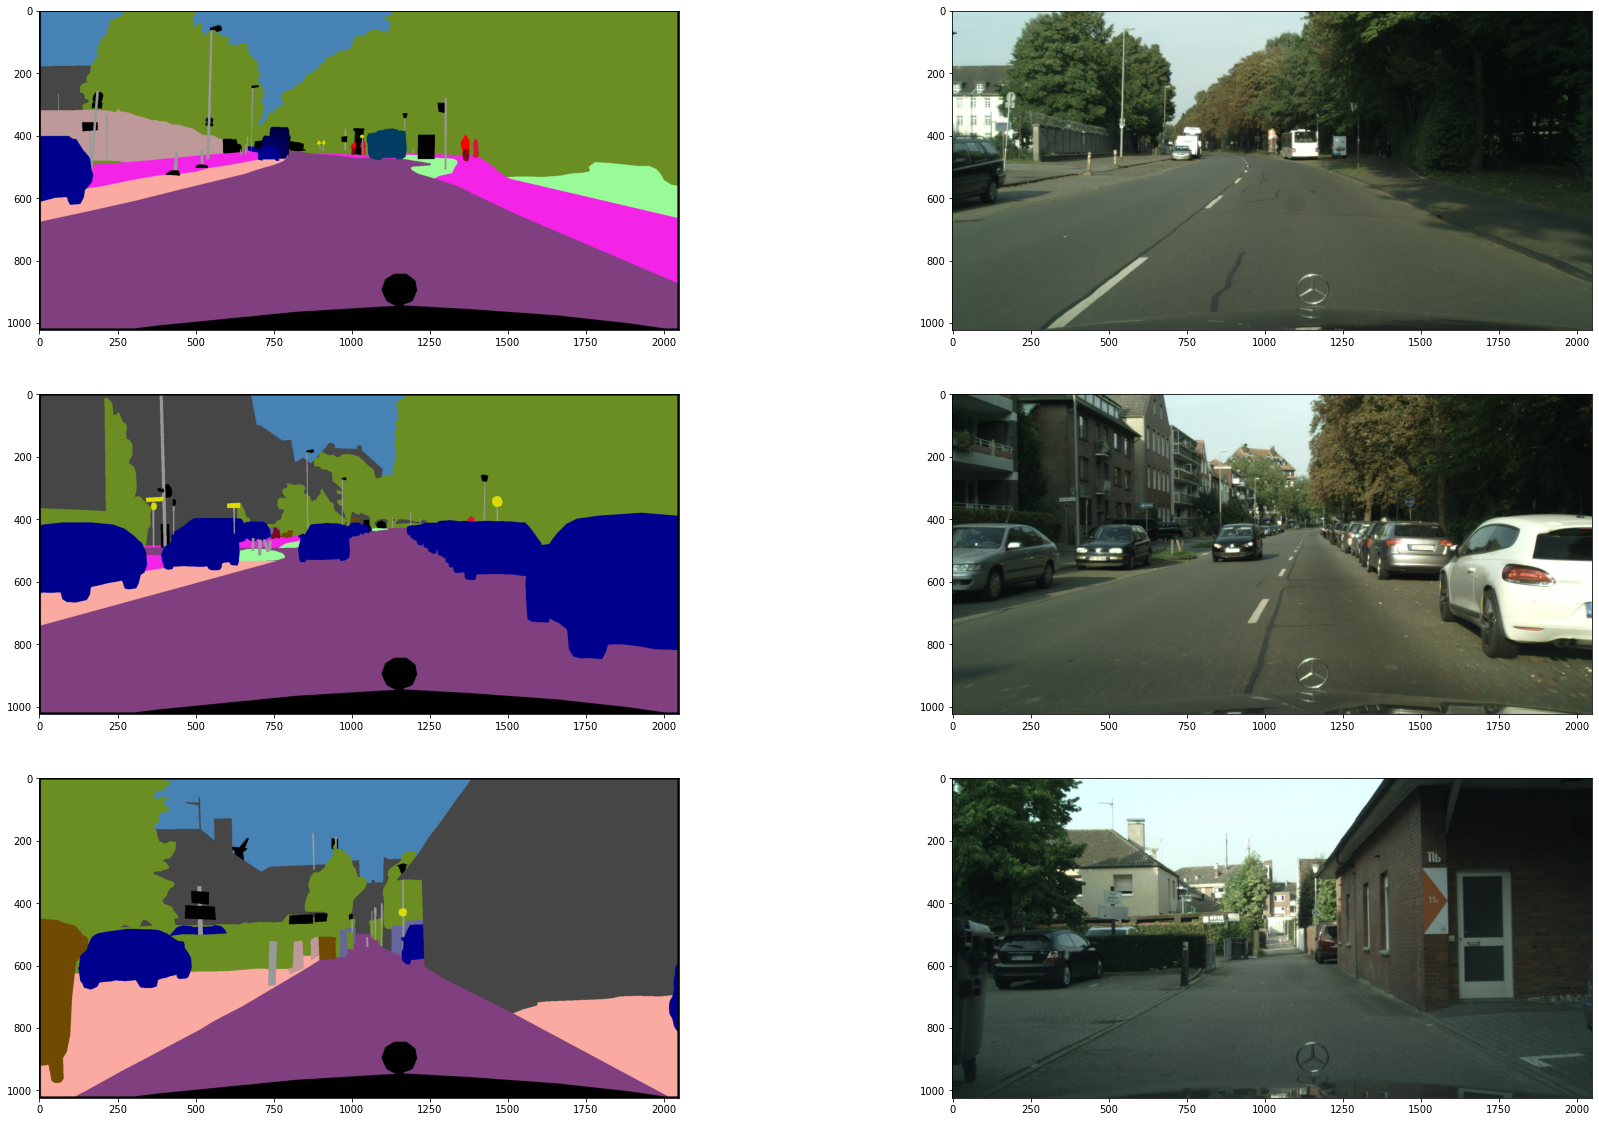

In [9]:
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline

list_of_segmentation_maps = segmentation_map_paths_overall[-3:]
list_of_photos = photo_overall[-3:]

f, axarr = plt.subplots(len(list_of_segmentation_maps),2, figsize=(30,20))

for iterator, (segmentation_map_path, photo_path) in enumerate(zip(list_of_segmentation_maps, list_of_photos)):
    segmentation_map_data = img.imread(segmentation_map_path)
    photo_data = img.imread(photo_path)
    axarr[iterator, 0].imshow(segmentation_map_data)
    axarr[iterator, 1].imshow(photo_data)

---
## Preprocess Dataset

### 1. Create Project Structure

In [10]:
training_dataset = Path.joinpath(dataset_folder, "training_dataset")
training_dataset_A = Path.joinpath(training_dataset, "A")
training_dataset_B = Path.joinpath(training_dataset, "B")

os.makedirs(training_dataset)
os.makedirs(training_dataset_A)
os.makedirs(training_dataset_B)

print("Project Structure for Training Data Created Successfully!")

Project Structure for Training Data Created Successfully!


In [11]:
validatation_dataset = Path.joinpath(dataset_folder, "validatation_dataset")
validatation_dataset_A = Path.joinpath(validatation_dataset, "A")
validatation_dataset_B = Path.joinpath(validatation_dataset, "B")

os.makedirs(validatation_dataset)
os.makedirs(validatation_dataset_A)
os.makedirs(validatation_dataset_B)

print("Project Structure for Validation Data Created Successfully!")

Project Structure for Validation Data Created Successfully!


In [12]:
test_dataset = Path.joinpath(dataset_folder, "test_dataset")
test_dataset_A = Path.joinpath(test_dataset, "A")
test_dataset_B = Path.joinpath(test_dataset, "B")

os.makedirs(test_dataset)
os.makedirs(test_dataset_A)
os.makedirs(test_dataset_B)

print("Project Structure for Test Data Created Successfully!")

Project Structure for Test Data Created Successfully!


### 2. Process Cityscape Dataset

In [13]:
# Function to evaluate if the images are matching pair
def evaluate_matching_pair(segmentation_map_path, photo_path):    
    
    segmentation_map_identifier = os.path.basename(segmentation_map_path).replace("_gtFine_color", "")
    photo_identifier = os.path.basename(photo_path).replace("_leftImg8bit", "")
    
    assert (segmentation_map_identifier == photo_identifier), ("Invalid Image Pair! {} and {} are not same!".format(segmentation_map_identifier, photo_identifier))

In [14]:
from PIL import Image

# Function to load resized images

def load_resized_images(image_path):    
    return Image.open(image_path).convert('RGB').resize((128, 128))

In [15]:
# Process Training Dataset

for iterator, (segmentation_map_path, photo_path) in enumerate(zip(segmentation_map_paths_train, photo_train)):
    
    evaluate_matching_pair(segmentation_map_path, photo_path)
    segmentation_map = load_resized_images(segmentation_map_path)
    photo = load_resized_images(photo_path)
    
    photo_output_path = Path.joinpath(training_dataset_A, "{}_A.jpg".format(iterator))
    photo.save(photo_output_path, format='JPEG', subsampling=0, quality=100)
    
    segmentation_map_output_path = Path.joinpath(training_dataset_B, "{}_B.jpg".format(iterator))
    segmentation_map.save(segmentation_map_output_path, format='JPEG', subsampling=0, quality=100)
    
    if(iterator%10 == 0):
        print(f"Processed {(iterator+1)/len(segmentation_map_paths_train) * 100:.2f}% Training Dataset.")
        
print("Training Data Processed Successfully!")

Processed 0.03% Training Dataset.
Processed 0.37% Training Dataset.
Processed 0.71% Training Dataset.
Processed 1.04% Training Dataset.
Processed 1.38% Training Dataset.
Processed 1.71% Training Dataset.
Processed 2.05% Training Dataset.
Processed 2.39% Training Dataset.
Processed 2.72% Training Dataset.
Processed 3.06% Training Dataset.
Processed 3.39% Training Dataset.
Processed 3.73% Training Dataset.
Processed 4.07% Training Dataset.
Processed 4.40% Training Dataset.
Processed 4.74% Training Dataset.
Processed 5.08% Training Dataset.
Processed 5.41% Training Dataset.
Processed 5.75% Training Dataset.
Processed 6.08% Training Dataset.
Processed 6.42% Training Dataset.
Processed 6.76% Training Dataset.
Processed 7.09% Training Dataset.
Processed 7.43% Training Dataset.
Processed 7.76% Training Dataset.
Processed 8.10% Training Dataset.
Processed 8.44% Training Dataset.
Processed 8.77% Training Dataset.
Processed 9.11% Training Dataset.
Processed 9.45% Training Dataset.
Processed 9.78

Processed 79.03% Training Dataset.
Processed 79.36% Training Dataset.
Processed 79.70% Training Dataset.
Processed 80.03% Training Dataset.
Processed 80.37% Training Dataset.
Processed 80.71% Training Dataset.
Processed 81.04% Training Dataset.
Processed 81.38% Training Dataset.
Processed 81.71% Training Dataset.
Processed 82.05% Training Dataset.
Processed 82.39% Training Dataset.
Processed 82.72% Training Dataset.
Processed 83.06% Training Dataset.
Processed 83.39% Training Dataset.
Processed 83.73% Training Dataset.
Processed 84.07% Training Dataset.
Processed 84.40% Training Dataset.
Processed 84.74% Training Dataset.
Processed 85.08% Training Dataset.
Processed 85.41% Training Dataset.
Processed 85.75% Training Dataset.
Processed 86.08% Training Dataset.
Processed 86.42% Training Dataset.
Processed 86.76% Training Dataset.
Processed 87.09% Training Dataset.
Processed 87.43% Training Dataset.
Processed 87.76% Training Dataset.
Processed 88.10% Training Dataset.
Processed 88.44% Tra

In [16]:
# Process Validation Dataset

for iterator, (segmentation_map_path, photo_path) in enumerate(zip(segmentation_map_paths_val, photo_val)):
    
    evaluate_matching_pair(segmentation_map_path, photo_path)
    segmentation_map = load_resized_images(segmentation_map_path)
    photo = load_resized_images(photo_path)
    
    photo_output_path = Path.joinpath(validatation_dataset_A, "{}_A.jpg".format(iterator))
    photo.save(photo_output_path, format='JPEG', subsampling=0, quality=100)
    
    segmentation_map_output_path = Path.joinpath(validatation_dataset_B, "{}_B.jpg".format(iterator))
    segmentation_map.save(segmentation_map_output_path, format='JPEG', subsampling=0, quality=100)
    
    if(iterator%10 == 0):
        print(f"Processed {(iterator+1)/len(segmentation_map_paths_val) * 100:.2f}% Validation Dataset.")
        
print("Validation Data Processed Successfully!")

Processed 0.20% Validation Dataset.
Processed 2.20% Validation Dataset.
Processed 4.20% Validation Dataset.
Processed 6.20% Validation Dataset.
Processed 8.20% Validation Dataset.
Processed 10.20% Validation Dataset.
Processed 12.20% Validation Dataset.
Processed 14.20% Validation Dataset.
Processed 16.20% Validation Dataset.
Processed 18.20% Validation Dataset.
Processed 20.20% Validation Dataset.
Processed 22.20% Validation Dataset.
Processed 24.20% Validation Dataset.
Processed 26.20% Validation Dataset.
Processed 28.20% Validation Dataset.
Processed 30.20% Validation Dataset.
Processed 32.20% Validation Dataset.
Processed 34.20% Validation Dataset.
Processed 36.20% Validation Dataset.
Processed 38.20% Validation Dataset.
Processed 40.20% Validation Dataset.
Processed 42.20% Validation Dataset.
Processed 44.20% Validation Dataset.
Processed 46.20% Validation Dataset.
Processed 48.20% Validation Dataset.
Processed 50.20% Validation Dataset.
Processed 52.20% Validation Dataset.
Proces

In [17]:
# Process Test Dataset

for iterator, (segmentation_map_path, photo_path) in enumerate(zip(segmentation_map_paths_test, photo_test)):
    
    evaluate_matching_pair(segmentation_map_path, photo_path)
    segmentation_map = load_resized_images(segmentation_map_path)
    photo = load_resized_images(photo_path)
    
    photo_output_path = Path.joinpath(test_dataset_A, "{}_A.jpg".format(iterator))
    photo.save(photo_output_path, format='JPEG', subsampling=0, quality=100)
    
    segmentation_map_output_path = Path.joinpath(test_dataset_B, "{}_B.jpg".format(iterator))
    segmentation_map.save(segmentation_map_output_path, format='JPEG', subsampling=0, quality=100)
    
    if(iterator%10 == 0):
        print(f"Processed {(iterator+1)/len(segmentation_map_paths_test) * 100:.2f}% Test Dataset.")
        
print("Test Data Processed Successfully!")

Processed 0.07% Test Dataset.
Processed 0.72% Test Dataset.
Processed 1.38% Test Dataset.
Processed 2.03% Test Dataset.
Processed 2.69% Test Dataset.
Processed 3.34% Test Dataset.
Processed 4.00% Test Dataset.
Processed 4.66% Test Dataset.
Processed 5.31% Test Dataset.
Processed 5.97% Test Dataset.
Processed 6.62% Test Dataset.
Processed 7.28% Test Dataset.
Processed 7.93% Test Dataset.
Processed 8.59% Test Dataset.
Processed 9.25% Test Dataset.
Processed 9.90% Test Dataset.
Processed 10.56% Test Dataset.
Processed 11.21% Test Dataset.
Processed 11.87% Test Dataset.
Processed 12.52% Test Dataset.
Processed 13.18% Test Dataset.
Processed 13.84% Test Dataset.
Processed 14.49% Test Dataset.
Processed 15.15% Test Dataset.
Processed 15.80% Test Dataset.
Processed 16.46% Test Dataset.
Processed 17.11% Test Dataset.
Processed 17.77% Test Dataset.
Processed 18.43% Test Dataset.
Processed 19.08% Test Dataset.
Processed 19.74% Test Dataset.
Processed 20.39% Test Dataset.
Processed 21.05% Test Da

### 3. Display Processed Dataset

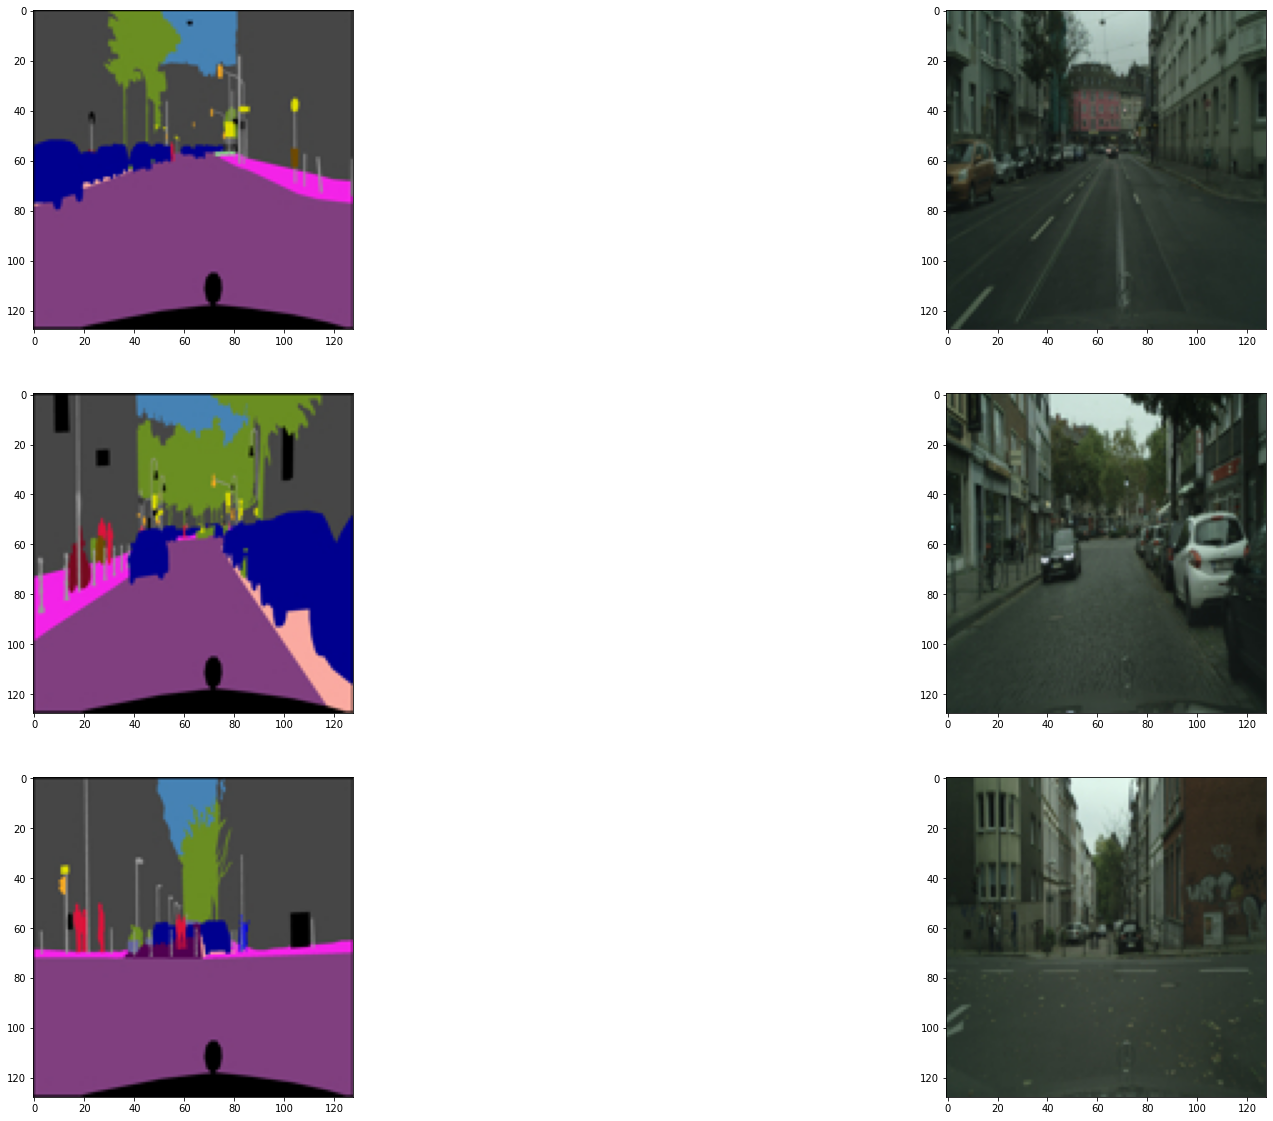

In [18]:
# Display Training Dataset Images

list_of_photos_expr = str(training_dataset_A) + "\\**\\*.jpg"
list_of_photos_paths = glob.glob(list_of_photos_expr, recursive=True)
list_of_photos_paths = sorted(list_of_photos_paths)
list_of_photos = list_of_photos_paths[-3:]

list_of_segmentation_maps_expr = str(training_dataset_B) + "\\**\\*.jpg"
list_of_segmentation_maps_paths = glob.glob(list_of_segmentation_maps_expr, recursive=True)
list_of_segmentation_maps_paths = sorted(list_of_segmentation_maps_paths)
list_of_segmentation_maps = list_of_segmentation_maps_paths[-3:]

f, axarr = plt.subplots(len(list_of_segmentation_maps),2, figsize=(30,20))

for iterator, (segmentation_map_path, photo_path) in enumerate(zip(list_of_segmentation_maps, list_of_photos)):
    segmentation_map_data = img.imread(segmentation_map_path)
    photo_data = img.imread(photo_path)
    axarr[iterator, 0].imshow(segmentation_map_data)
    axarr[iterator, 1].imshow(photo_data)

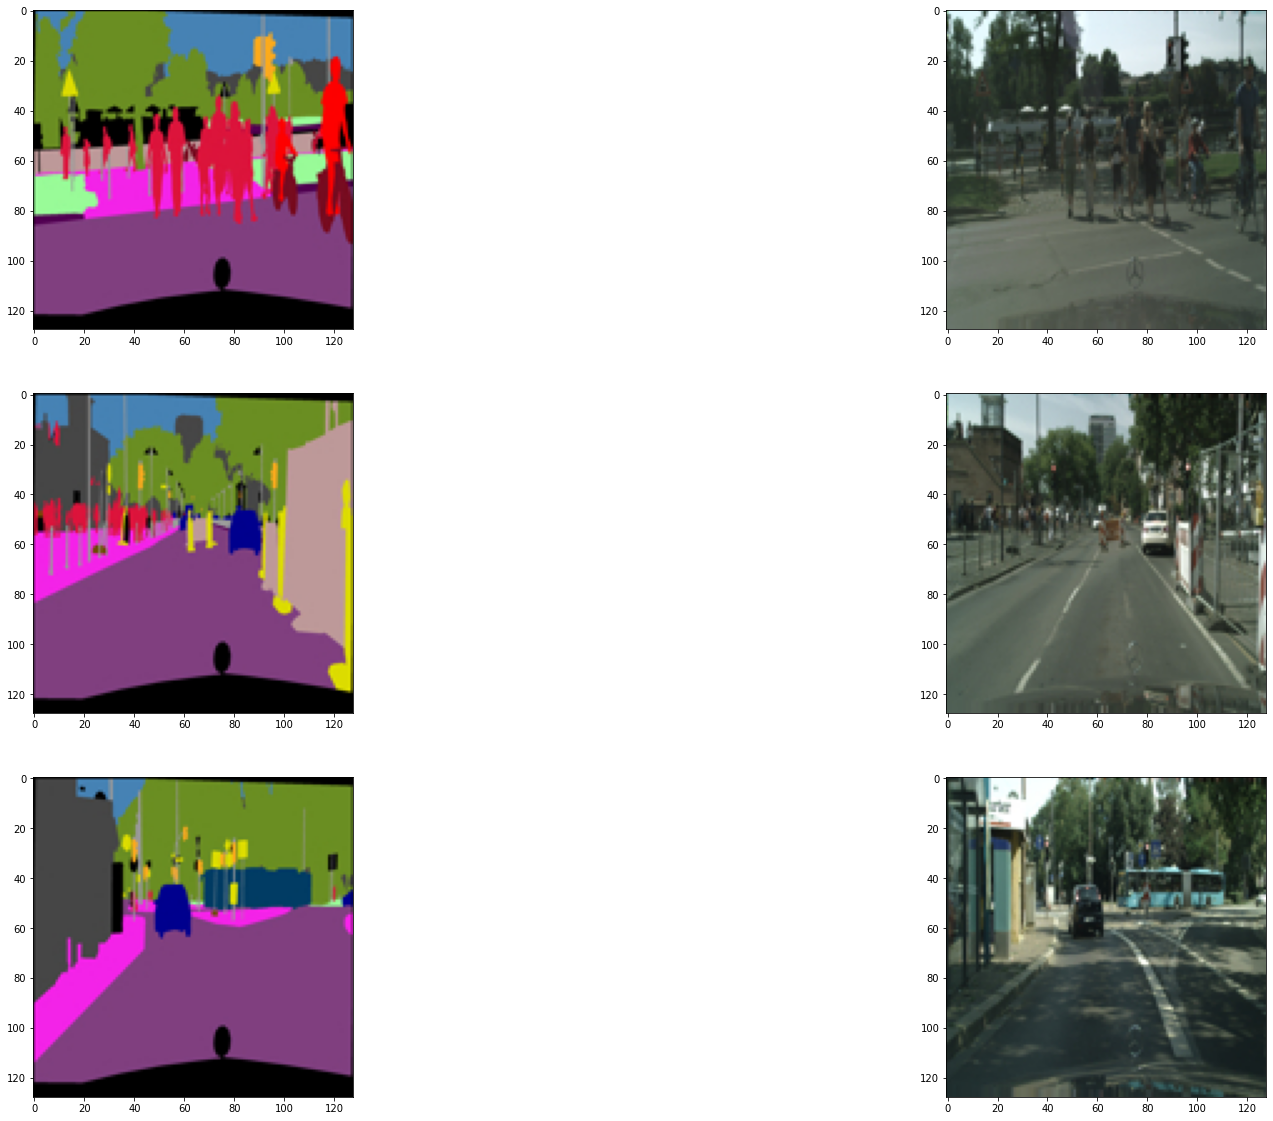

In [19]:
# Display Validation Dataset Images

list_of_photos_expr = str(validatation_dataset_A) + "\\**\\*.jpg"
list_of_photos_paths = glob.glob(list_of_photos_expr, recursive=True)
list_of_photos_paths = sorted(list_of_photos_paths)
list_of_photos = list_of_photos_paths[-3:]

list_of_segmentation_maps_expr = str(validatation_dataset_B) + "\\**\\*.jpg"
list_of_segmentation_maps_paths = glob.glob(list_of_segmentation_maps_expr, recursive=True)
list_of_segmentation_maps_paths = sorted(list_of_segmentation_maps_paths)
list_of_segmentation_maps = list_of_segmentation_maps_paths[-3:]

f, axarr = plt.subplots(len(list_of_segmentation_maps),2, figsize=(30,20))

for iterator, (segmentation_map_path, photo_path) in enumerate(zip(list_of_segmentation_maps, list_of_photos)):
    segmentation_map_data = img.imread(segmentation_map_path)
    photo_data = img.imread(photo_path)
    axarr[iterator, 0].imshow(segmentation_map_data)
    axarr[iterator, 1].imshow(photo_data)

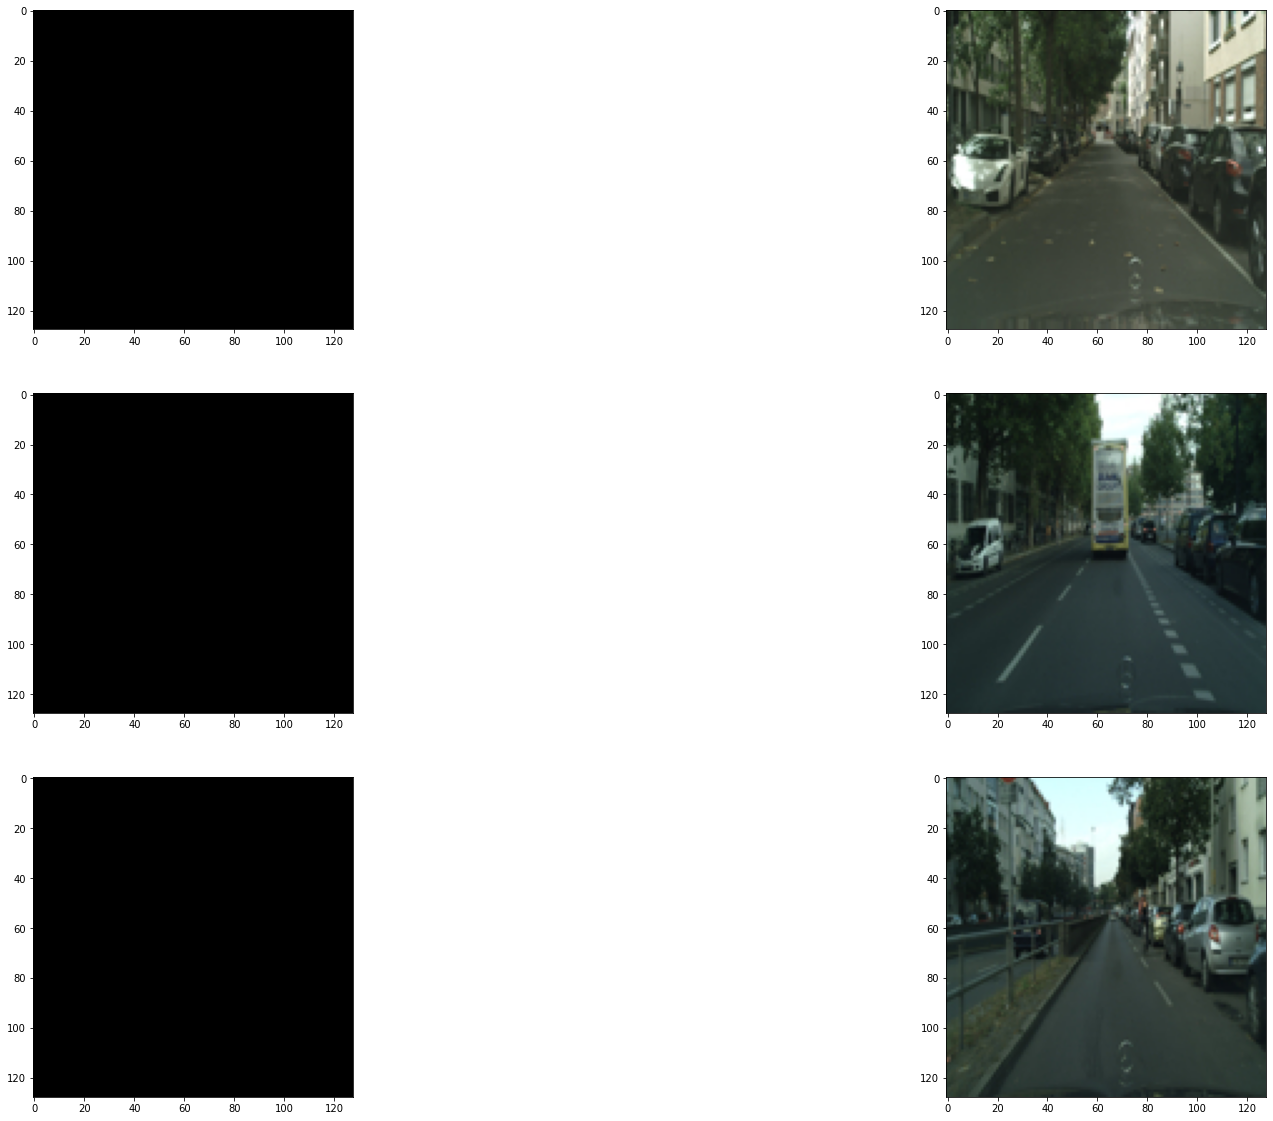

In [20]:
# Display Test Dataset Images

list_of_photos_expr = str(test_dataset_A) + "\\**\\*.jpg"
list_of_photos_paths = glob.glob(list_of_photos_expr, recursive=True)
list_of_photos_paths = sorted(list_of_photos_paths)
list_of_photos = list_of_photos_paths[-3:]

list_of_segmentation_maps_expr = str(test_dataset_B) + "\\**\\*.jpg"
list_of_segmentation_maps_paths = glob.glob(list_of_segmentation_maps_expr, recursive=True)
list_of_segmentation_maps_paths = sorted(list_of_segmentation_maps_paths)
list_of_segmentation_maps = list_of_segmentation_maps_paths[-3:]

f, axarr = plt.subplots(len(list_of_segmentation_maps),2, figsize=(30,20))

for iterator, (segmentation_map_path, photo_path) in enumerate(zip(list_of_segmentation_maps, list_of_photos)):
    segmentation_map_data = img.imread(segmentation_map_path)
    photo_data = img.imread(photo_path)
    axarr[iterator, 0].imshow(segmentation_map_data)
    axarr[iterator, 1].imshow(photo_data)

**Important:**

Based on the information from the official documentation of the dataset, it can be confirmed that the semantic segmentation map for the test dataset contains dummy annotations and can be ignored.

---
## Wrapping Up

**Congratulations!!**

You have successfully prepared the dataset required and created the project structure to run this project. You can now run the project by running the `data_augmentation_using_generative_adversarial_networks.ipynb` notebook that should be available in the same folder.